# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

According to the Materials and Methods section of the referenced paper (Moro, Cortez, Rita, 2014), the dataset represents the results of 17 different marketing campaigns conducted by a Portuguese banking institution between May 2008 and November 2010.

So the bank telemarketing data you’re working with comes from 17 campaigns.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [3]:
bank_df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [5]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [7]:
bank_df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [9]:

## Clean up unknown data
bank_df =bank_df[bank_df['job']!="unknown"]
bank_df =bank_df[bank_df['marital']!="unknown"]
bank_df =bank_df[bank_df['education']!="unknown"]
bank_df =bank_df[bank_df['default']!="unknown"]
bank_df =bank_df[bank_df['housing']!="unknown"]
bank_df =bank_df[bank_df['loan']!="unknown"]

## Verifying it
#bank_df['job'].value_counts()
#bank_df['marital'].value_counts()
#bank_df['education'].value_counts()
#bank_df['default'].value_counts()
#bank_df['housing'].value_counts()
#bank_df['loan'].value_counts()


In [11]:
## Cleaning up previous contacted column in to two columns.
#previously_contacted (Binary): 1 if pdays is not 999 and 0 otherwise
# days_since_last_contact (Numeric): This new column will contain the actual pdays value for previously contacted customers and a placeholder like -1 or 0
bank_df['previously_contacted'] = bank_df['pdays'].apply(lambda x: 0 if x == 999 else 1)
bank_df['days_since_last_contact'] = bank_df['pdays'].replace(999, -1)


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [13]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      30488 non-null  int64  
 1   job                      30488 non-null  object 
 2   marital                  30488 non-null  object 
 3   education                30488 non-null  object 
 4   default                  30488 non-null  object 
 5   housing                  30488 non-null  object 
 6   loan                     30488 non-null  object 
 7   contact                  30488 non-null  object 
 8   month                    30488 non-null  object 
 9   day_of_week              30488 non-null  object 
 10  duration                 30488 non-null  int64  
 11  campaign                 30488 non-null  int64  
 12  pdays                    30488 non-null  int64  
 13  previous                 30488 non-null  int64  
 14  poutcome                 30

In [15]:
bank_df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,previously_contacted,days_since_last_contact
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,-1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,-1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,-1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,-1
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,-1
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,-1
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,-1
11,25,services,single,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,-1
12,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,-1
13,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,-1


### Business Objective

Build and evaluate binary classification models that predict whether a bank client will subscribe to a term deposit based on client demographics, past interactions, campaign details, and economic indicators. The goal is to identify high-probability subscribers to optimize telemarketing campaign efficiency

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [17]:
## Change y to binary value. 1 for yes and 0 for no
bank_df['y'] = bank_df['y'].apply(lambda x: 1 if x == 'yes' else 0)
bank_df['y']

bank_df['y'].value_counts()

y
0    26629
1     3859
Name: count, dtype: int64

In [19]:
bank_df = bank_df.drop(columns = ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','previously_contacted'])

In [21]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,days_since_last_contact
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,0,-1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,0,-1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,0,-1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,0,-1
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,0,-1


In [23]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan']

#One-hot encode using pandas get_dummies 
X_cat = pd.get_dummies(bank_df[categorical_cols], drop_first=True)  # drop_first avoids dummy trap
numeric_cols = ['age']  
X_num = bank_df[numeric_cols]
X = pd.concat([X_num, X_cat], axis=1)
X = X.astype(float)  # or X.astype(int)

y = bank_df['y']

In [25]:
X

,age,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_yes,housing_yes,loan_yes
0,56.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,37.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,56.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
41184,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41185,56.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
41186,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [27]:
## Split data to test(20%) and train(80%)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [31]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Majority class baseline
baseline = DummyClassifier(strategy='most_frequent')
baseline.fit(X_train, y_train)
y_pred_baseline = baseline.predict(X_test)

print("Baseline Accuracy:", accuracy_score(y_test, y_pred_baseline))



Baseline Accuracy: 0.8734011151197114


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [35]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(max_iter =1000, random_state =42)
logreg_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [37]:
# Predict class labels
y_pred = logreg_model.predict(X_test)
y_proba = logreg_model.predict_proba(X_test)[:,1] #probability of getting 1
y_proba

array([0.14889345, 0.13515027, 0.11122115, ..., 0.13083309, 0.11498667,
       0.12711315])

### Problem 9: Score the Model

What is the accuracy of your model?

In [39]:
print("Accuracy score of Logistic Regression:", accuracy_score(y_test, y_pred))


Accuracy score of Logistic Regression: 0.8734011151197114


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## Defining classifiers
models = {
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=5))
    ]),
    "LogReg": LogisticRegression(max_iter=500, solver="liblinear"),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC()
}

baseline_results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    baseline_results.append([name, acc, f1])

baseline_df = pd.DataFrame(baseline_results, columns=["Model","Accuracy","F1"])
print("\n=== Baseline Performance ===")
print(baseline_df)



=== Baseline Performance ===
          Model  Accuracy        F1
0           KNN  0.864710  0.113856
1        LogReg  0.873401  0.000000
2  DecisionTree  0.854542  0.134634
3           SVM  0.873401  0.000000


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# --- Improved Models with scaling and balancing ---
improved_models = {
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=5))
    ]),
    "LogReg": Pipeline([
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(max_iter=1000, solver="liblinear", class_weight="balanced"))
    ]),
    "DecisionTree": DecisionTreeClassifier(max_depth=10, class_weight="balanced", random_state=42),
    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("svm", SVC(kernel="rbf", class_weight="balanced"))
    ])
}

improved_results = []

for name, model in improved_models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    improved_results.append([name, acc, f1])

improved_df = pd.DataFrame(improved_results, columns=["Model","Accuracy","F1"])
print("\n=== Improved Performance ===")
print(improved_df)


=== Improved Performance ===
          Model  Accuracy        F1
0           KNN  0.864710  0.113856
1        LogReg  0.622007  0.266624
2  DecisionTree  0.605772  0.264832
3           SVM  0.598065  0.261969


In [59]:
comparison = baseline_df.merge(improved_df, on="Model", suffixes=("_Baseline","_Improved"))
print("\n=== Comparison Before vs After ===")
print(comparison)


=== Comparison Before vs After ===
          Model  Accuracy_Baseline  F1_Baseline  Accuracy_Improved  \
0           KNN           0.864710     0.113856           0.864710   
1        LogReg           0.873401     0.000000           0.622007   
2  DecisionTree           0.854542     0.134634           0.605772   
3           SVM           0.873401     0.000000           0.598065   

   F1_Improved  
0     0.113856  
1     0.266624  
2     0.264832  
3     0.261969  


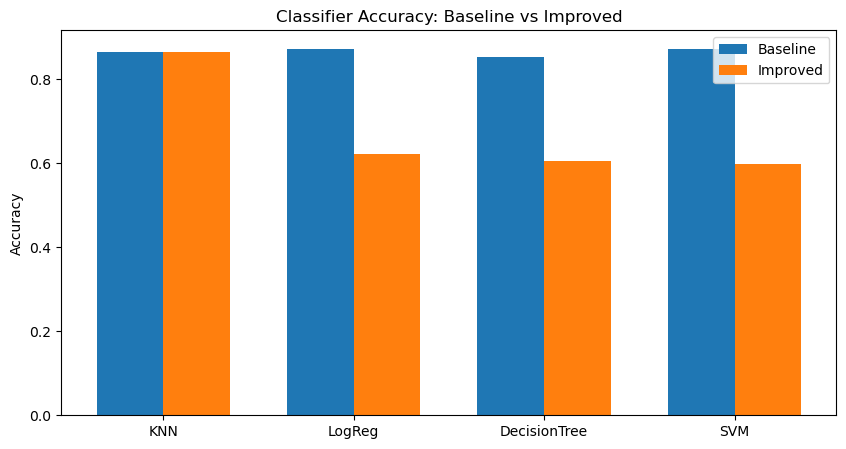

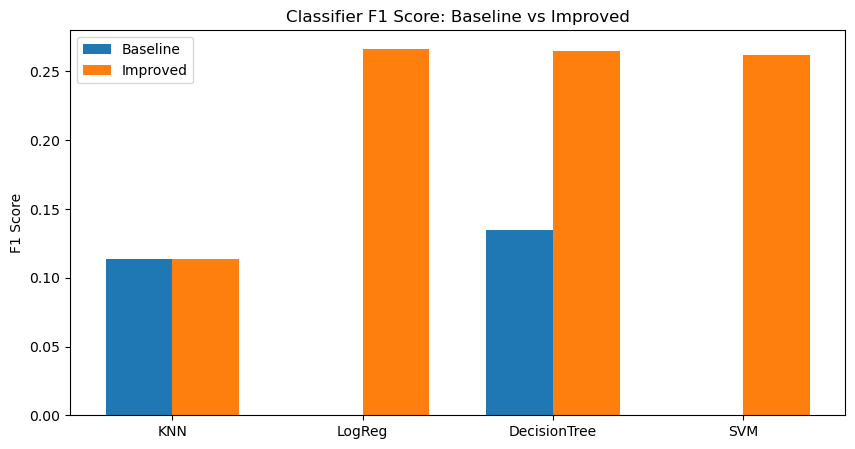

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Merge results if not already done
comparison = baseline_df.merge(improved_df, on="Model", suffixes=("_Baseline","_Improved"))

# --- Accuracy comparison ---
plt.figure(figsize=(10,5))
x = np.arange(len(comparison["Model"]))  # positions
width = 0.35

plt.bar(x - width/2, comparison["Accuracy_Baseline"], width, label="Baseline")
plt.bar(x + width/2, comparison["Accuracy_Improved"], width, label="Improved")

plt.xticks(x, comparison["Model"])
plt.ylabel("Accuracy")
plt.title("Classifier Accuracy: Baseline vs Improved")
plt.legend()
plt.show()

# --- F1 comparison ---
plt.figure(figsize=(10,5))
plt.bar(x - width/2, comparison["F1_Baseline"], width, label="Baseline")
plt.bar(x + width/2, comparison["F1_Improved"], width, label="Improved")

plt.xticks(x, comparison["Model"])
plt.ylabel("F1 Score")
plt.title("Classifier F1 Score: Baseline vs Improved")
plt.legend()
plt.show()

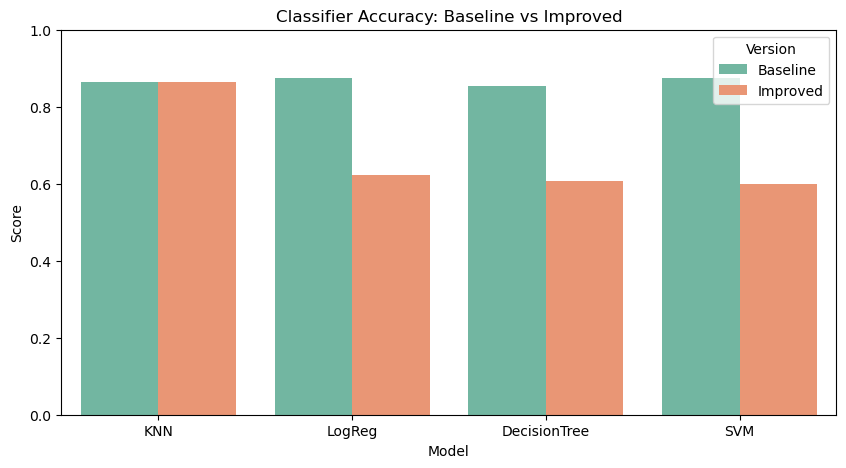

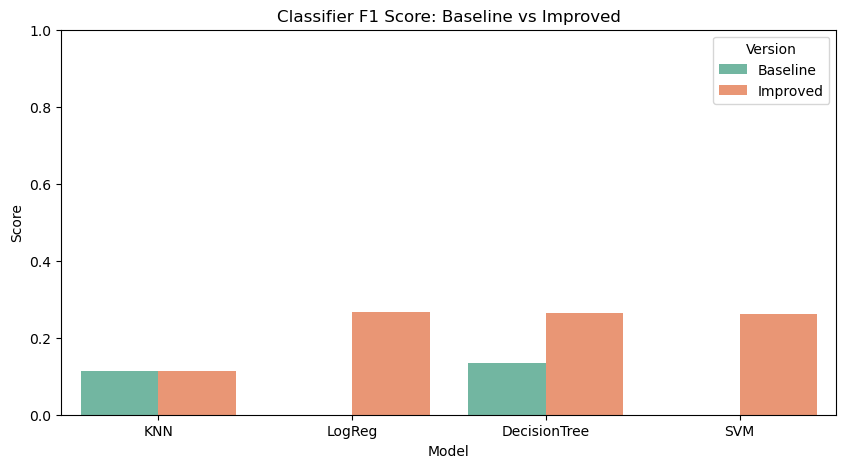

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape dataframe to long format
comparison_long = comparison.melt(
    id_vars="Model",
    value_vars=["Accuracy_Baseline","Accuracy_Improved","F1_Baseline","F1_Improved"],
    var_name="Metric_Type",
    value_name="Score"
)

# Split into Metric (Accuracy/F1) and Version (Baseline/Improved)
comparison_long["Metric"] = comparison_long["Metric_Type"].apply(lambda x: x.split("_")[0])
comparison_long["Version"] = comparison_long["Metric_Type"].apply(lambda x: x.split("_")[1])

# --- Accuracy Plot ---
plt.figure(figsize=(10,5))
sns.barplot(
    data=comparison_long[comparison_long["Metric"]=="Accuracy"],
    x="Model", y="Score", hue="Version", palette="Set2"
)
plt.title("Classifier Accuracy: Baseline vs Improved")
plt.ylim(0,1)
plt.show()

# --- F1 Plot ---
plt.figure(figsize=(10,5))
sns.barplot(
    data=comparison_long[comparison_long["Metric"]=="F1"],
    x="Model", y="Score", hue="Version", palette="Set2"
)
plt.title("Classifier F1 Score: Baseline vs Improved")
plt.ylim(0,1)
plt.show()

## Observations

### Baseline Models

Accuracy looks high (≈85–87%) across KNN, Logistic Regression, Decision Tree, and SVM. But F1 scores are very low (≈0.0–0.13).
This means the models are predicting mostly the majority class (“no” = not subscribing) and ignoring the minority class (“yes”).
The imbalance in the dataset makes accuracy misleading — accuracy is high simply because most clients do not subscribe.
Improved Models (with scaling + class balancing + some tuning)Accuracy drops for Logistic Regression, Decision Tree, and SVM (down to ~60%).But F1 scores improve significantly (from ~0.0 to ~0.26).

This indicates the models are now actually identifying some positive cases (“yes” = subscribed), which is much more useful for the business goal.

KNN didn’t improve because balancing/scaling didn’t help much on this feature set — it’s still too biased toward the majority.

### Conclusion
Baseline models are misleading: high accuracy but useless for predicting the positive class (the actual business target).
Improved models are better aligned with the business objective: they sacrifice overall accuracy but significantly improve F1, meaning they identify subscribers more effectively.
For a marketing application, recall/F1 is more important than raw accuracy, since the bank wants to catch as many potential subscribers as possible.

##### Questions